In [88]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure

In [89]:
def loadTweet():
    twt = pd.read_csv("merged_csv_dataset_forTweet.csv")
    return twt
tweet = loadTweet()

In [90]:
def loadSlang():
    slang = pd.read_csv("slang_database.csv")
    return slang
slang = loadSlang()
print(slang)

    Abbreviations                       Text
0             lol          laughing out loud
1            rofl                   laughing
2             brb              be right back
3             ily                 i love you
4              ty                  thank you
..            ...                        ...
291           AYV          Are you vertical?
292           AYW                As you were
293           AYW  As you want / As you wish
294           AZN                      Asian
295           yrs                      years

[296 rows x 2 columns]


In [91]:
data_dict = slang.set_index('Abbreviations')['Text'].to_dict()

In [92]:
def implementation(tweet):
    match = 0
    tweet.lower()
    for index, row in slang.iterrows():
        try:
            match= tweet.index(row['Abbreviations']) 
        except (ValueError, TypeError):
            match=-1
        if match>-1:
            punct = [""," ",".", ",","!","?"]
            #print(tweet[tweet.index(row['Abbreviations'])])
            if match == 0 or tweet[(match-1):match] in punct:
                tweet = tweet.replace(row['Abbreviations'], row['Text'])
    return tweet

# Test cases

In [93]:
# example of 1 sentence
oneExample = "lol I will dm you."
print(implementation(oneExample))

laughing out loud I will direct message whyou.


In [94]:
smallExample = pd.read_csv("small_dataset_example.csv")
print(smallExample)

                                             Love it!
0   So awesome. Read my morning meditation anytime...
1   Just replaced one add with another, albeit AA ...
2   Don't bother upgrading. There is zero differen...
3   Every time I go to share the reading it pops u...
4                                    Good, simple app
5   This is a great app has too many commercials b...
6   Paid for the "Pro" and it still doesn't displa...
7   App works as intended. Sobriety date set and s...
8   Thank you I was able to get the pro. Daily ref...
9   I have Loved the Daily Reflection for over 20y...
10  All works great for me on my tablet. Had to fi...
11  Got the Pro edition hoping it would be an impr...
12  Fantastic positive daily excerpts from the boo...
13  I love this app, but my sobriety date and time...
14  Excellent for the recovering addict to b remin...
15  extremely handy to have all my morning reading...
16                                           awesome?
17                          

In [95]:
#example of small dataset
print(implementation(smallExample.to_string()))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Love it!
0                                                                                                                                                                                                                                                                                                                                                                                      Gentle warning, like "Hmm? What did you say?"o awesome. Read my morning meditation anytime I want. Great app im glad i 

# Time complexity for plot

In [96]:
from tryItABunch import tryItABunch
nValuesNaive, tValuesNaive = tryItABunch(implementation, startN = 148, endN = 25000, stepSize=74, numTrials=5)

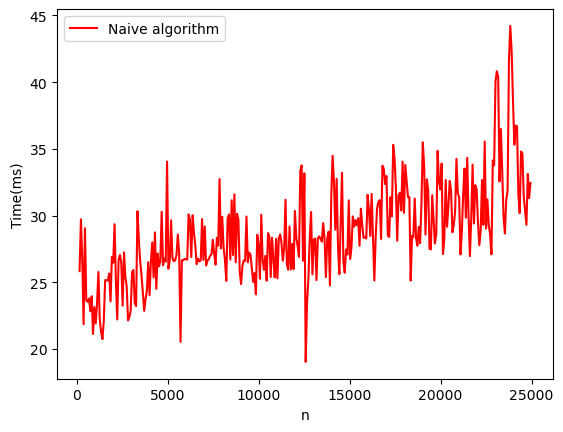

In [97]:
plt.plot(nValuesNaive, tValuesNaive,color="red", label="Naive algorithm")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()

In [98]:
from tryItABunchOn import tryItABunchOn
nValuesNaive2, tValuesNaive2 = tryItABunchOn(numTrials=5)

Text(0.5, 1.0, 'Naive algorithm and O(n)')

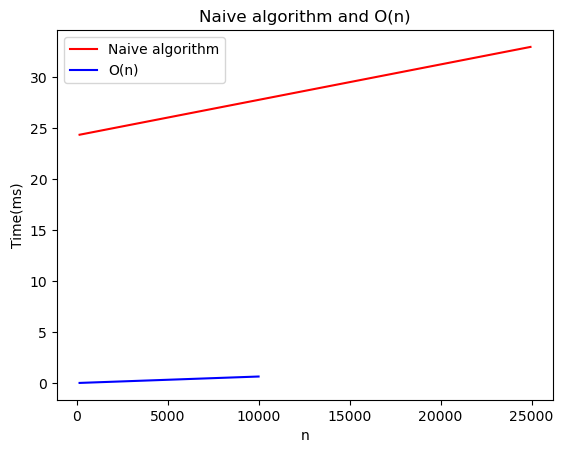

In [99]:
m, b = np.polyfit(nValuesNaive, tValuesNaive, 1)
nValuesNaiveNP = np.array(nValuesNaive)

m2, b2 = np.polyfit(nValuesNaive2, tValuesNaive2, 1)
nValuesONP = np.array(nValuesNaive2)

plt.plot(nValuesNaive, m* nValuesNaiveNP+ b,color="red", label="Naive algorithm")

plt.plot(nValuesNaive2, m2* nValuesONP+ b2,color="blue", label="O(n)")

plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive algorithm and O(n)")